In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/multi_agent_sim")
from multi_agent_sim import MultiAgentSim

In [50]:
import re
def extract_sim_properties(filename):
    # remove pickle extension and brackets
    key_name = filename.split('.pickle')[0]
    key_name = key_name.split('/')[-1]
    base_fname = re.sub('[()]', '', key_name)
    properties = base_fname.split(',')
    R0 = float(properties[0])
    at_mult = float(properties[1])
    st_freq = float(properties[2])
    use_at = (properties[3].strip() == 'True')
    use_st = (properties[4].strip() == 'True')
    return (R0, at_mult, st_freq, use_at, use_st)


import pickle as pickle
def load_sim_output(fname):
    with open(fname, "rb") as handle:
        sim_output = pickle.load(handle)
    return sim_output


def trajectory_data(trajectory):
    total_tests = trajectory[0]
    infection_counts = trajectory[1]
    init_infection_counts = trajectory[2]
    final_infection_counts = trajectory[3]
    return total_tests, infection_counts, init_infection_counts, final_infection_counts

def load_sim_outputs(sim_output_dir):
    sim_pickle_files = [sim_output_dir + '/' + file for  file in os.listdir(sim_output_dir) if ').pickle' in file]


    sim_outputs = {}
    for fname in sim_pickle_files:
        sim_properties = extract_sim_properties(fname)
        sim_output = load_sim_output(fname)
        sim_outputs[sim_properties] = sim_output

    print("Loaded {} simulation results".format(len(sim_outputs)))
    return sim_outputs

Loaded 285 simulation results


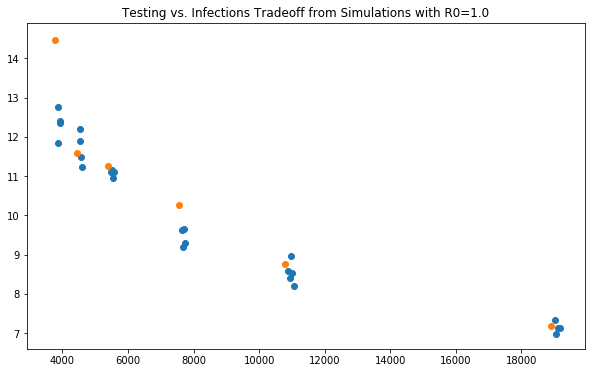

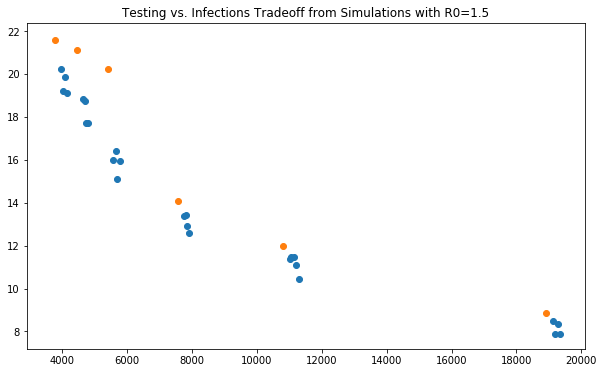

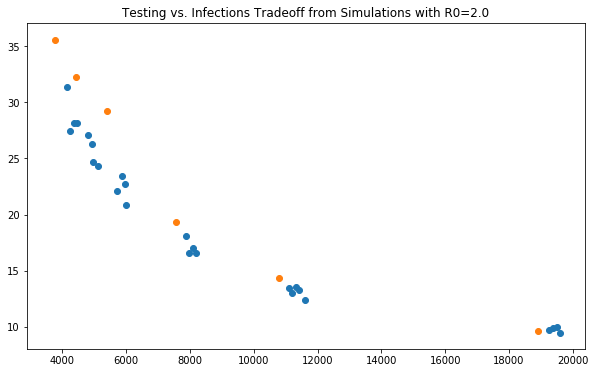

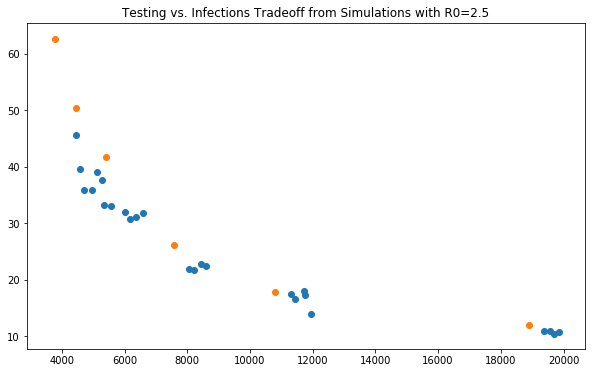

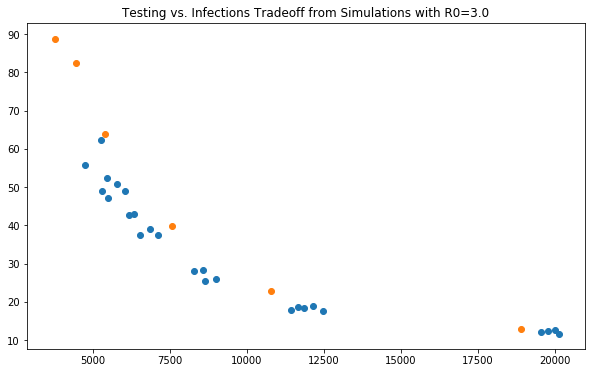

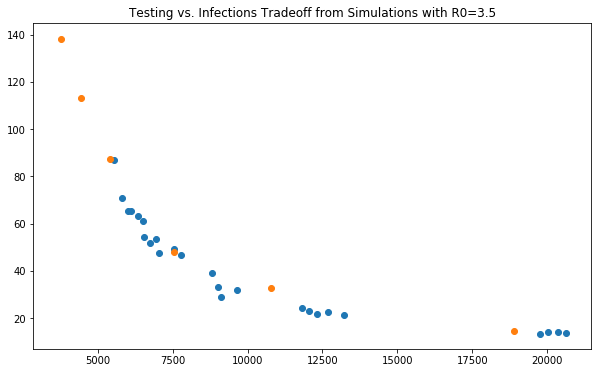

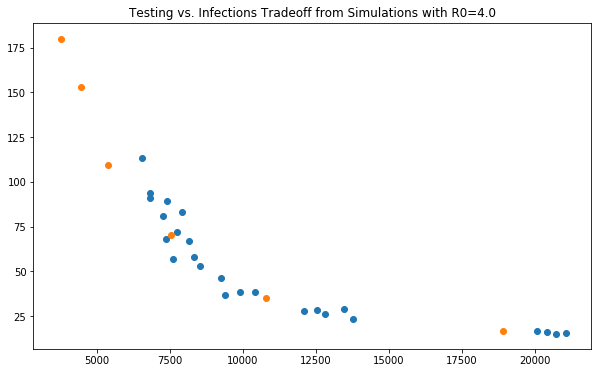

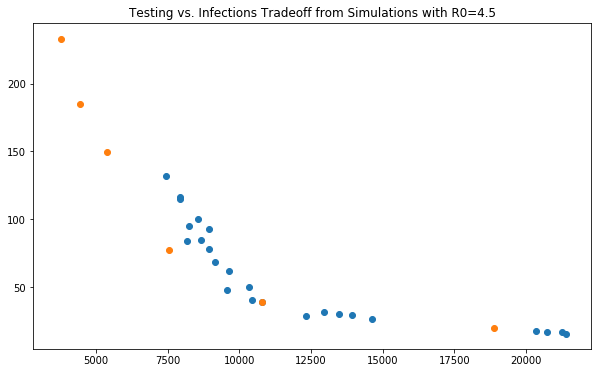

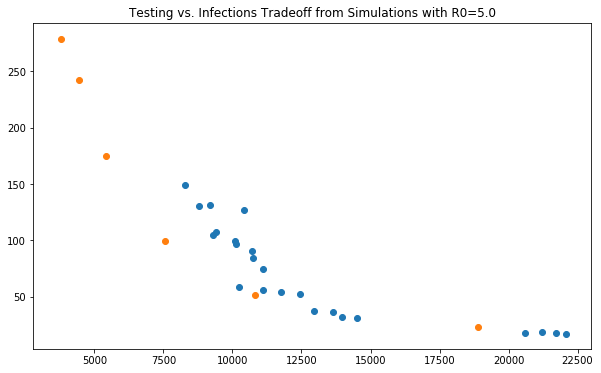

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

# create scatter plot of tests vs. infections

def get_avg_tests(sim_output):
    return np.mean([traj[0] for traj in sim_output])

def get_avg_infxns(sim_output):
    return np.mean([traj[-1] for traj in sim_output])

def tests_vs_infxns_plot(R0, sim_outputs):
    no_at_test_counts = []
    no_at_infxn_counts = []
    uses_at_test_counts = []
    uses_at_infxn_counts = []
    for sim_properties, sim_output in sim_outputs.items():
        if sim_properties[0] != R0:
            continue
        if not sim_properties[-1]:
            continue
        uses_at = sim_properties[3]
        
        total_tests = get_avg_tests(sim_output)
        total_infxns = get_avg_infxns(sim_output)
        
        if uses_at:
            uses_at_test_counts.append(total_tests)
            uses_at_infxn_counts.append(total_infxns)
        else:
            no_at_test_counts.append(total_tests)
            no_at_infxn_counts.append(total_infxns)
    
    plt.figure(figsize=(10,6))
    plt.scatter(uses_at_test_counts, uses_at_infxn_counts, label='Using Adaptive and Surveillance Testing')
    plt.scatter(no_at_test_counts, no_at_infxn_counts, label='Surveillance Testing Only')
    plt.title('Testing vs. Infections Tradeoff from Simulations with R0={}'.format(R0))
    plt.show()
    
def make_test_vs_infxns_plots(sim_output_dir):
    sim_outputs = load_sim_outputs(sim_output_dir)

    all_R0s = sorted(list(set([p[0] for p in sim_outputs])))
    for R0 in all_R0s:
        tests_vs_infxns_plot(R0, sim_outputs)

make_test_vs_infxns_plots('.')
            
        

Loaded 270 simulation results


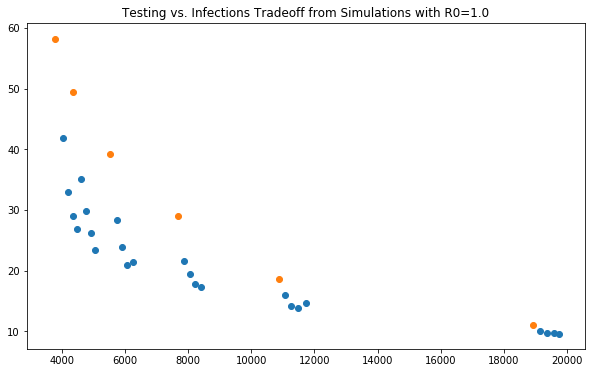

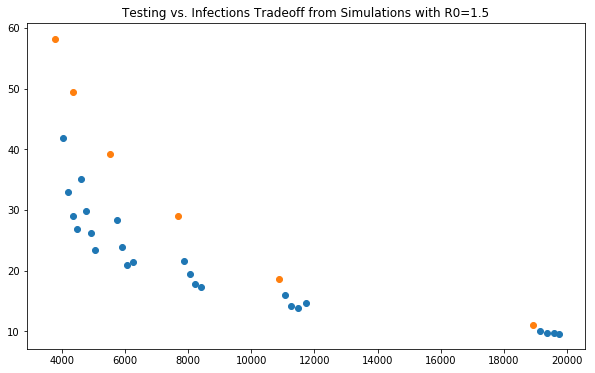

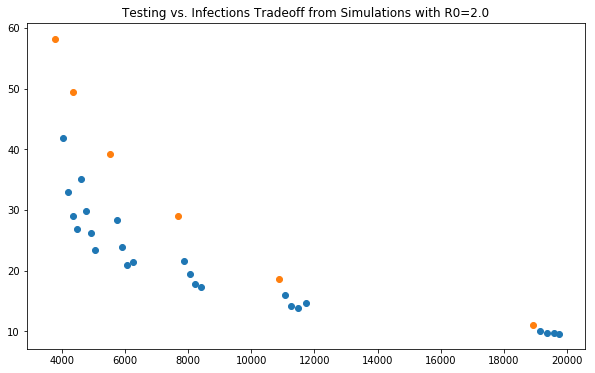

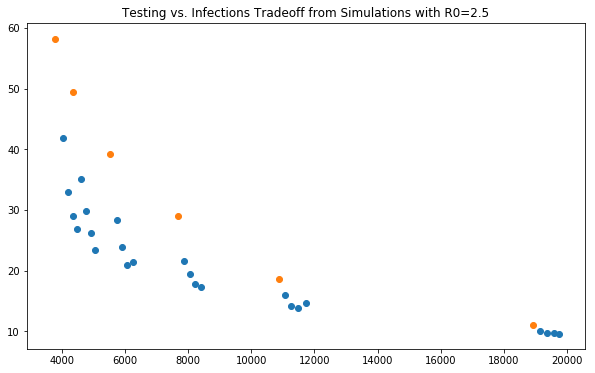

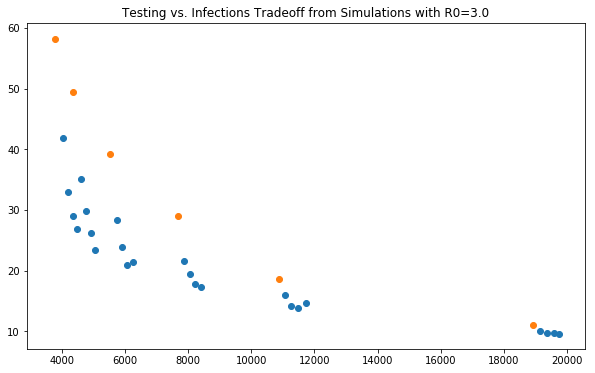

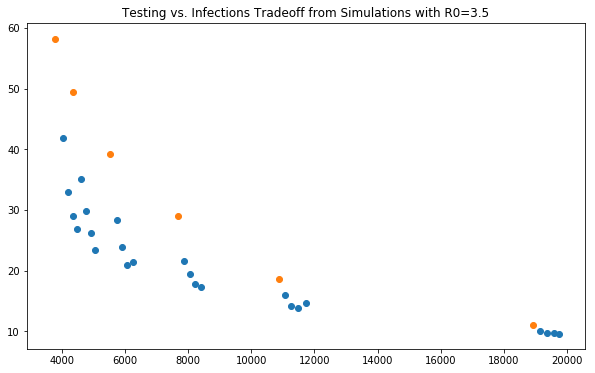

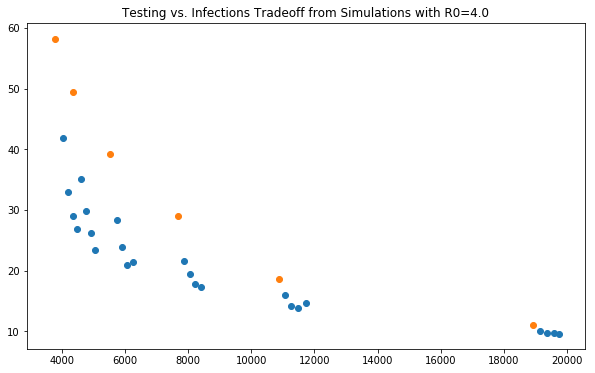

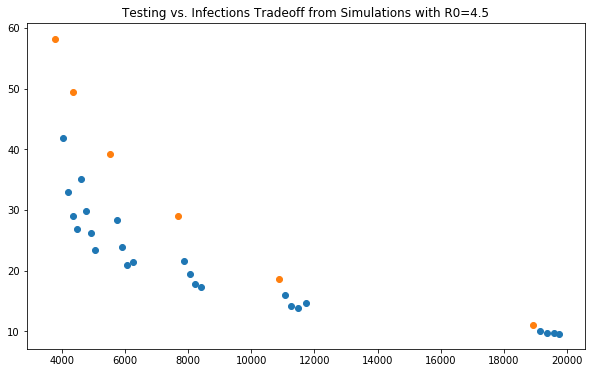

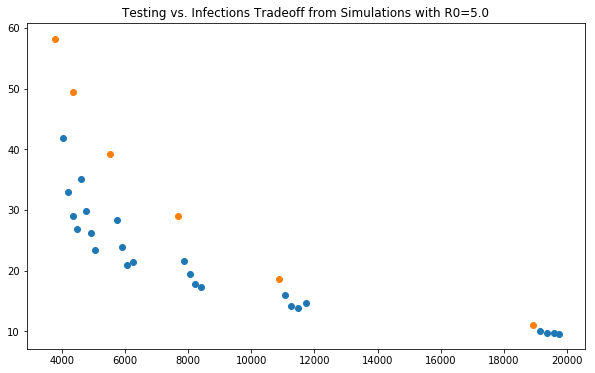

In [51]:
make_test_vs_infxns_plots('./jan_05_multiagent_sims/')

In [34]:
sim_output = sim_outputs[(3.5, (12.0, 4.0, True, True))]

In [35]:
sim_output

[(19526,
  [0,
   0,
   1,
   1,
   1,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4],
  0,
  4),
 (19628,
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   3,
   3,
   4,
   4,
   4,
   5,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7

In [15]:
len(sim)

250

In [10]:
fname = "(1, (10, 7, True, True)).pickle_v2"
fname.strip('(')

'1, (10, 7, True, True)).pickle_v2'

In [4]:
'(2)'.strip('(').strip(')')

'2'